## Import

In [1]:
%run indicator_functions.ipynb

import pandas as pd
import numpy as np

import requests
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
pd.set_option('display.max_columns', None)

### API Call

API used is from [Alpha Vantage](https://www.alphavantage.co/documentation/)

In [2]:
function = 'TIME_SERIES_DAILY'
symbol = 'AMZN'
api_key = '1W0X0E2POGJ6T74Z'
output_size = 'full'


url = 'https://www.alphavantage.co/query?function={}&symbol={}&outputsize={}&apikey={}'.format(
            function, symbol, output_size, api_key)

response = requests.get(url)

# grab correct info into dataframe
response_dict = json.loads(response.text)
data = response_dict['Time Series (Daily)']
df = pd.DataFrame.from_dict(data)

# Fix dataframe into correct format
df = df.T
df = df.iloc[::-1]

df = df.astype(float)
df.index = pd.to_datetime(df.index)
df.rename_axis(symbol, inplace=True)

df.columns = (['Open', 'High', 'Low', 'Close', 'Volume'])

In [3]:
df

,Open,High,Low,Close,Volume
AMZN,,,,,
1999-11-01,68.06,71.8800,66.3100,69.13,12824100.0
1999-11-02,69.75,70.0000,65.0600,66.44,13243200.0
1999-11-03,68.19,68.5000,65.0000,65.81,10772100.0
1999-11-04,67.19,67.1900,61.0000,63.06,16759200.0
1999-11-05,64.75,65.5000,62.2500,64.94,11091400.0
...,...,...,...,...,...
2021-02-17,3263.60,3320.9100,3259.4996,3308.64,3261801.0
2021-02-18,3282.42,3338.0000,3273.9400,3328.23,3033607.0
2021-02-19,3328.23,3333.5000,3245.7500,3249.90,4305184.0


## Column Engineering

### Sentiments

Creating three different y values:  
  
<u>regression model:</u>
<ul>
<li> **"r_percent_increase_high"** measures the percent jump from last close to the highest high within a five day period. </li> 
     
<li> **"r_percent_increase_close"** measures the percent jump from last close to the highest close within a five day period.  </li>
</ul>

<u>classification model:</u>
<ul>
<li> **"c_four_percent_high"** measures if the current day will see a 4 percent jump to the highest high within a five day period.</li>

</ul>

In [4]:
# initializing new features
df['r_percent_increase_high'] = np.nan
df['r_percent_increase_close'] = np.nan
df['c_four_percent_high'] = np.nan


for i in range(len(df)):
    
    # end loop when can't confirm then next five days
    if i == len(df)-5:
        break
        
    current_close = df.iloc[i]['Close']
    max_high = max(df.iloc[i+1 : i+6]['High'])
    max_close = max(df.iloc[i+1 : i+6]['Close'])
    
    percent_change_up = (max_high - current_close) / current_close
    percent_change_up_close = (max_close - current_close) / current_close
    
    #adding new features to df
    df.iloc[i, df.columns.get_loc('r_percent_increase_high')] = percent_change_up * 100
    df.iloc[i, df.columns.get_loc('r_percent_increase_close')] = percent_change_up_close * 100
    
    if percent_change_up >= .04:
        df.iloc[i, df.columns.get_loc('c_four_percent_high')] = 1
    else:
        df.iloc[i, df.columns.get_loc('c_four_percent_high')] = 0

In [5]:
df.iloc[-17:-12]

,Open,High,Low,Close,Volume,r_percent_increase_high,r_percent_increase_close,c_four_percent_high
AMZN,,,,,,,,
2021-01-29,3230.00,3236.99,3184.550,3206.20,4293556.0,7.104984,5.420747,1.0
2021-02-01,3242.36,3350.26,3235.025,3342.88,4160212.0,2.725793,1.110420,0.0
2021-02-02,3380.00,3427.74,3361.125,3380.00,6183716.0,1.597633,-0.823964,0.0
2021-02-03,3425.01,3434.00,3308.620,3312.53,7088781.0,1.946247,1.196065,0.0
2021-02-04,3330.00,3347.00,3277.750,3331.00,3670661.0,1.380967,0.634944,0.0


### Technical Indicators

All technical indicator functions is in the indicator_functions notebook

In [6]:
for i in range(len(df)):
    sma(df, i)
    stochastic(df, i)
    rsi(df,i)
    roc(df,i)
    atr(df,i)
    adx(df,i)

In [7]:
df.tail()

,Open,High,Low,Close,Volume,r_percent_increase_high,r_percent_increase_close,c_four_percent_high,SMA,SMA_diff,Stochastic,Stochastic_diff,rsi_up_var,rsi_down_var,RSI,RSI_diff,ROC,ROC_diff,tr,ATR,ATR_diff,pos_dx,neg_dx,dx,ADX,ADX_diff
AMZN,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-17,3263.60,3320.9100,3259.4996,3308.64,3261801.0,NaN,NaN,NaN,3301.677778,-0.432222,49.745440,15.911004,39.69,0.00,58.067459,13.510477,-0.117433,3.168070,61.4104,71.143864,-5.573543,12.61,0.0,12.143636,9.981486,-0.124220
2021-02-18,3282.42,3338.0000,3273.9400,3328.23,3033607.0,NaN,NaN,NaN,3301.370000,-0.307778,57.598717,7.853277,19.59,0.00,59.322976,1.255517,-0.083158,0.034275,64.0600,70.506007,-0.637857,17.09,0.0,23.871276,10.650869,0.669383
2021-02-19,3328.23,3333.5000,3245.7500,3249.90,4305184.0,NaN,NaN,NaN,3290.008889,-11.361111,8.266481,-49.332237,0.00,78.33,54.100514,-5.222461,-3.050281,-2.967123,87.7500,72.983150,2.477143,0.00,0.0,23.871276,11.320252,0.669383
2021-02-22,3208.13,3232.3199,3172.2600,3180.74,3461266.0,NaN,NaN,NaN,3274.208889,-15.800000,3.239856,-5.026624,0.00,69.16,32.578330,-21.522184,-4.279343,-1.229062,77.6400,68.238864,-4.744286,0.00,0.0,15.076784,10.043158,-1.277094
2021-02-23,3127.03,3204.7300,3093.6000,3194.50,4615557.0,NaN,NaN,NaN,3261.931111,-12.277778,29.641598,26.401742,13.76,0.00,29.014888,-3.563442,-3.343419,0.935924,111.1300,70.115293,1.876429,0.00,0.0,97.292760,16.478663,6.435505


## EDA

In [8]:
df.dropna(inplace=True)
df = df[-1500:]

lower_4 = df.loc[df['c_four_percent_high'] == 0]
higher_4 = df.loc[df['c_four_percent_high'] == 1]

### c_four_percent_high

In [9]:
df['c_four_percent_high'].value_counts()

0.0    1053
1.0     447
Name: c_four_percent_high, dtype: int64

### sma

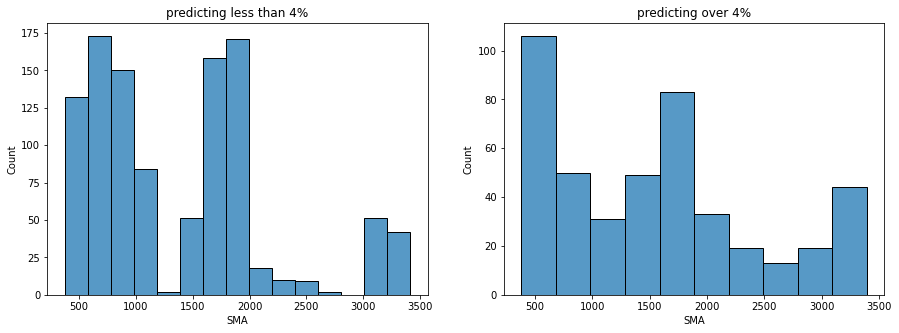

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data=lower_4, x='SMA', ax=ax[0]).set_title('predicting less than 4%');
sns.histplot(data=higher_4, x='SMA', ax=ax[1]).set_title('predicting over 4%');

### stochastic 

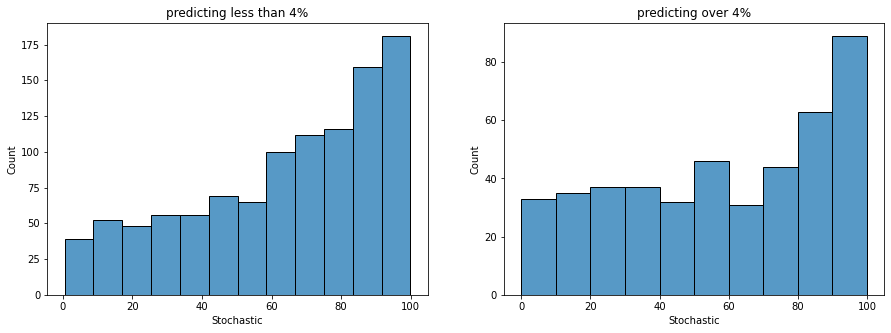

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data=lower_4, x='Stochastic', ax=ax[0]).set_title('predicting less than 4%');
sns.histplot(data=higher_4, x='Stochastic', ax=ax[1]).set_title('predicting over 4%');

### rsi

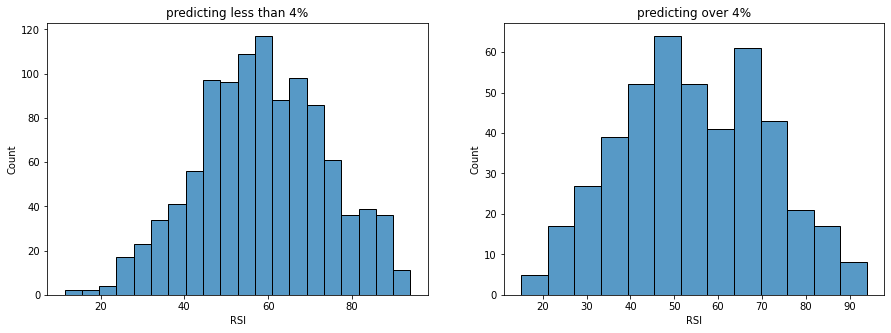

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data=lower_4, x='RSI', ax=ax[0]).set_title('predicting less than 4%');
sns.histplot(data=higher_4, x='RSI', ax=ax[1]).set_title('predicting over 4%');

### roc

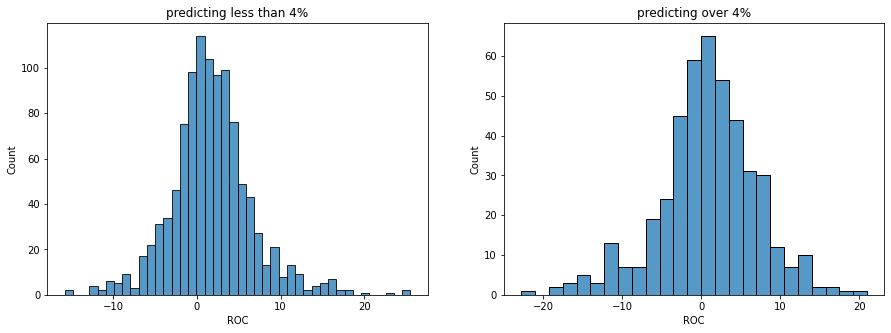

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data=lower_4, x='ROC', ax=ax[0]).set_title('predicting less than 4%');
sns.histplot(data=higher_4, x='ROC', ax=ax[1]).set_title('predicting over 4%');

### atr

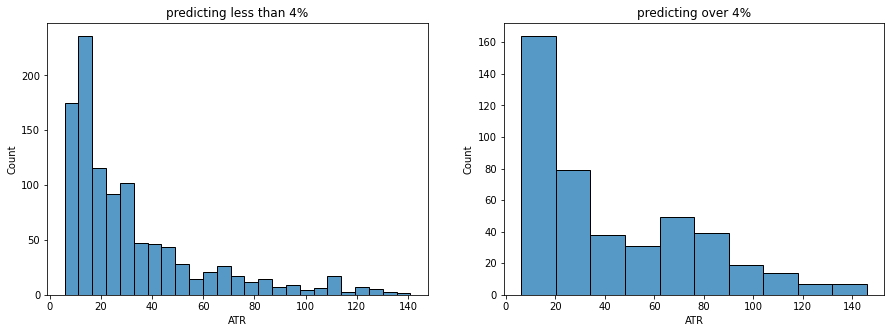

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data=lower_4, x='ATR', ax=ax[0]).set_title('predicting less than 4%');
sns.histplot(data=higher_4, x='ATR', ax=ax[1]).set_title('predicting over 4%');

### adx

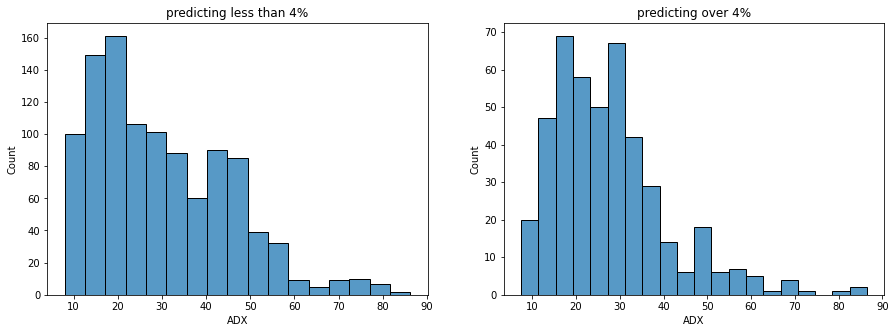

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data=lower_4, x='ADX', ax=ax[0]).set_title('predicting less than 4%');
sns.histplot(data=higher_4, x='ADX', ax=ax[1]).set_title('predicting over 4%');

## Export

In [16]:
df.tail()

,Open,High,Low,Close,Volume,r_percent_increase_high,r_percent_increase_close,c_four_percent_high,SMA,SMA_diff,Stochastic,Stochastic_diff,rsi_up_var,rsi_down_var,RSI,RSI_diff,ROC,ROC_diff,tr,ATR,ATR_diff,pos_dx,neg_dx,dx,ADX,ADX_diff
AMZN,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-09,3312.49,3338.0000,3297.840,3305.00,2179355.0,0.481392,0.110136,0.0,3310.035556,8.046667,48.286230,-8.833461,0.00,17.94,53.781436,-11.194860,2.240316,2.336223,40.1600,83.163514,-8.491429,0.00,0.0,20.515965,11.441331,-2.827150
2021-02-10,3314.00,3317.9548,3254.000,3286.58,3125174.0,1.564544,1.267275,0.0,3315.475556,5.440000,40.901984,-7.384245,0.00,18.42,48.056672,-5.724765,1.512222,-0.728094,63.9548,81.648143,-1.515371,0.00,0.0,2.908345,11.117971,-0.323360
2021-02-11,3292.00,3292.0000,3248.060,3262.13,2301417.0,2.325781,2.026283,0.0,3321.690000,6.214444,31.100421,-9.801563,0.00,24.45,47.185969,-0.870703,1.744433,0.232211,43.9400,82.019171,0.371029,0.00,0.0,2.908345,10.794611,-0.323360
2021-02-12,3250.00,3280.2500,3233.310,3277.71,2335339.0,1.839394,1.541320,0.0,3314.448889,-7.241111,37.346162,6.245741,15.58,0.00,48.515393,1.329424,-1.949517,-3.693949,46.9400,76.747479,-5.271693,0.00,0.0,8.845452,10.177171,-0.617440
2021-02-16,3254.05,3308.3000,3253.591,3268.95,2574721.0,2.112299,1.813426,0.0,3302.110000,-12.338889,33.834436,-3.511726,0.00,8.76,44.556981,-3.958412,-3.285503,-1.335986,54.7090,76.717407,-0.030071,28.05,0.0,11.071322,10.105706,-0.071465


In [17]:
df.to_csv('../data/amzn.csv')